# **SENTIMENT ANALYSIS**


##### **BUSINESS PROBLEM**

## **2. DATA EXPLORATION:**

##### **2.1 GETTING THE SYSTEM READY**

In [6]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Tweets.csv')
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


##### **2.2 DATASET CONTENT**

In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


##### **2.2 EXPLORATORY DATA ANALYSIS**

Text(0.5, 1.0, 'Missing Values Heatmap')

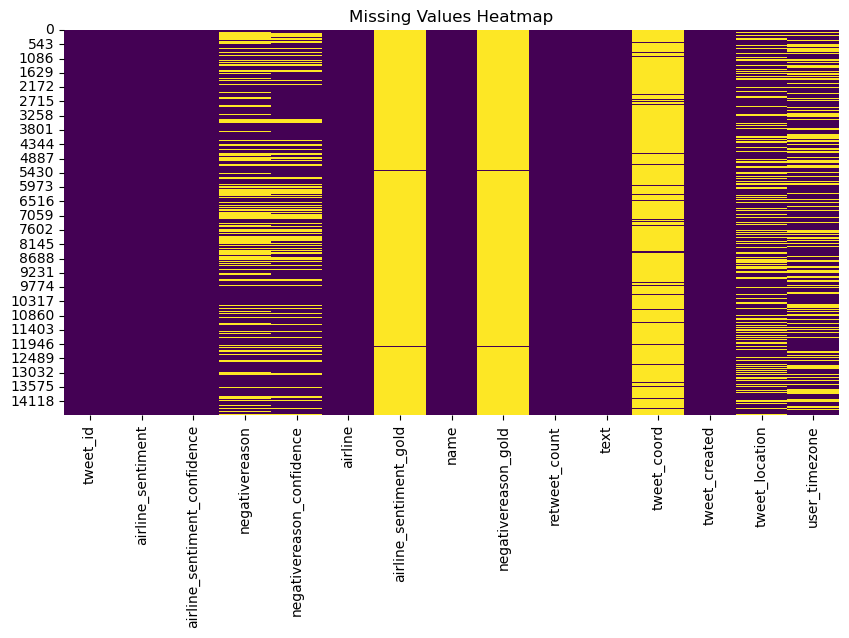

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")

- **This clearly indicates which columns have missing values as well as where these missing values are in the dataset**

<Axes: title={'center': 'Missing Values per Column'}>

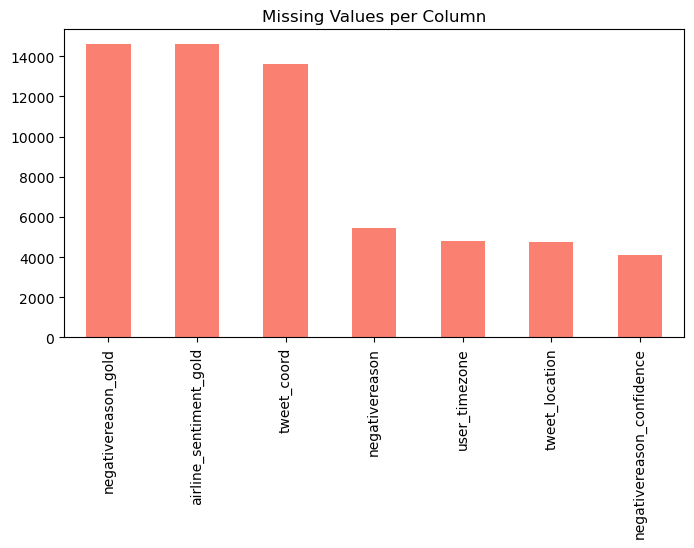

In [10]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0].plot(kind='bar', figsize=(8,4), color='salmon', title='Missing Values per Column')

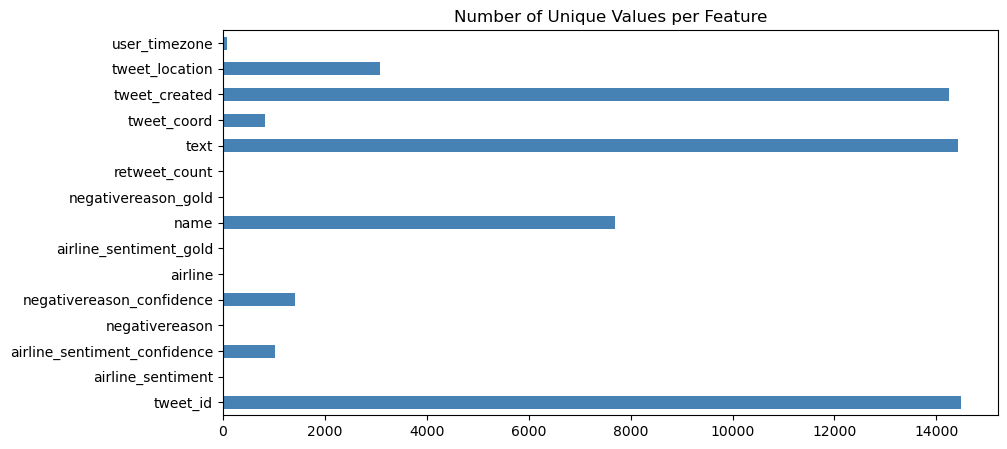

In [11]:
df.nunique().plot(kind='barh', figsize=(10,5), color='steelblue', title='Number of Unique Values per Feature')
plt.show()

<Axes: xlabel='airline_sentiment'>

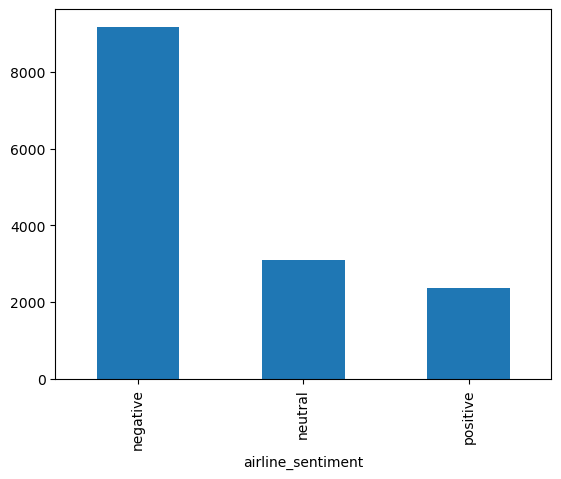

In [13]:
df['airline_sentiment'].value_counts().plot(kind='bar')

In [26]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')
nltk.download('punkt', download_dir='C:\\Users\\marcu\\AppData\\Roaming\\nltk_data')

df = pd.read_csv("Tweets.csv")

# Keep only relevant columns
df = df[['airline_sentiment', 'text']]

# Load stopwords once
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    try:
        text = str(text).lower()  # Make sure it's a string
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'[^\w\s]', '', text)
        tokens = text.split()  # Use split instead of nltk tokenize
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [stemmer.stem(word) for word in tokens]
        return ' '.join(tokens)
    except Exception as e:
        print(f"Error cleaning text: {text} -> {e}")
        return ""

try:
    df['clean_text'] = df['text'].apply(clean_text)
except Exception as e:
    print("Error:", e)

# Encode labels
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
# Added bi-grams to help the model understand context better
# A bi-gram is a sequence of two adjacent elements from a string of tokens, which can help capture context better than unigrams alone.
X = vectorizer.fit_transform(df['clean_text']).toarray()

# Define features and labels
y = df['sentiment_encoded']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### **LOGISTIC REGRESSION**


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.7978142076502732
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      1889
           1       0.65      0.49      0.56       580
           2       0.83      0.61      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.71      2928
weighted avg       0.79      0.80      0.79      2928



##### **RANDOM FOREST**

In [28]:
# from sklearn.ensemble import RandomForestClassifier

# # Initialize and train Random Forest model
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Predictions
# y_pred_rf = rf.predict(X_test)

# # Evaluation
# print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
# print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


##### **FINE-TUNING THE MODEL TO INCREASE PERFORMANCE**

##### **SAVING THE MODEL FILE**

In [ ]:
best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Save the model and vectorizer
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)